In [1]:
#You'll need to install pandas-datareader for this to work!
#Pandas datareader allows you to read stock information directly from the internet

In [2]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from pandas_datareader import data,wb
import yfinance as yf 
yf.pdr_override()

In [3]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [4]:
#Bank Of America
BAC =data.get_data_yahoo('BAC',start,end)
#CitiGroup
C =data.get_data_yahoo('C',start,end)
#goldman Sachs
GS =data.get_data_yahoo('GS',start,end)
#Chase JPM
JPM =data.get_data_yahoo('JPM',start,end)
#Morgan Stanley
MS =data.get_data_yahoo('MS',start,end)
#Wells Fargo
WFC =data.get_data_yahoo('WFC',start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
BAC

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,46.919998,47.180000,46.150002,47.080002,32.425453,16296700
2006-01-04,47.000000,47.240002,46.450001,46.580002,32.081085,17757900
2006-01-05,46.580002,46.830002,46.320000,46.639999,32.122398,14970700
2006-01-06,46.799999,46.910000,46.349998,46.570000,32.074192,12599800
2006-01-09,46.720001,46.970001,46.360001,46.599998,32.094856,15619400
...,...,...,...,...,...,...
2015-12-24,17.320000,17.379999,17.219999,17.270000,14.669743,29369400
2015-12-28,17.219999,17.230000,16.980000,17.129999,14.550819,41777500
2015-12-29,17.250000,17.350000,17.160000,17.280001,14.678235,45670400


In [6]:
#Combining the tickers as a single data
tickers = ['BAC','C','GS','JPM','MS','WFC']

In [7]:
Bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)  #multi level index on cols

In [8]:
# Bank_stocks.head()

In [9]:
#setting columns index names 
Bank_stocks.columns.names=['Bank Ticker','Stock Info']

In [10]:
Bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  32.425453  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  32.081085  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  32.122398  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  32.074192  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  32.094856  15619400   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05   484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06   488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09   486.000000  487.399994  483.000000  483.899994  ...  58.619999   

Bank Ticker                                       WFC                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2006-01-03   58.310001  33.585449  5377000  31.600000  31.975000  31.195000   
2006-01-04   58.349998  33.608498  7977800  31.799999  31.820000  31.365000   
2006-01-05   58.509998  33.700645  5778000  31.500000  31.555000  31.309999   
2006-01-06   58.570000  33.735214  6889800  31.580000  31.775000  31.385000   
2006-01-09   59.189999  34.092319  4144500  31.674999  31.825001  31.555000   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2006-01-03   31.900000  19.369589  11016400  
2006-01-04   31.530001  19.144930  10870000  
2006-01-05   31.495001  19.123684  10158000  
2006-01-06   31.680000  19.236008   8403800  
2006-01-09   31.674999  19.232969   5619600  

[5 rows x 36 columns]

In [11]:
#EDA
#max close price for each bank throughout the period
# for i in tickers:
#     print(i,Bank_stocks[i]['Close'].max())
# or   use xs stands for cross section
Bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [12]:
#creating return of each stock
returns = pd.DataFrame()

In [13]:
for tick in tickers:
    returns[tick+' Returns'] = Bank_stocks[tick]['Close'].pct_change()

In [14]:
returns.head()

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


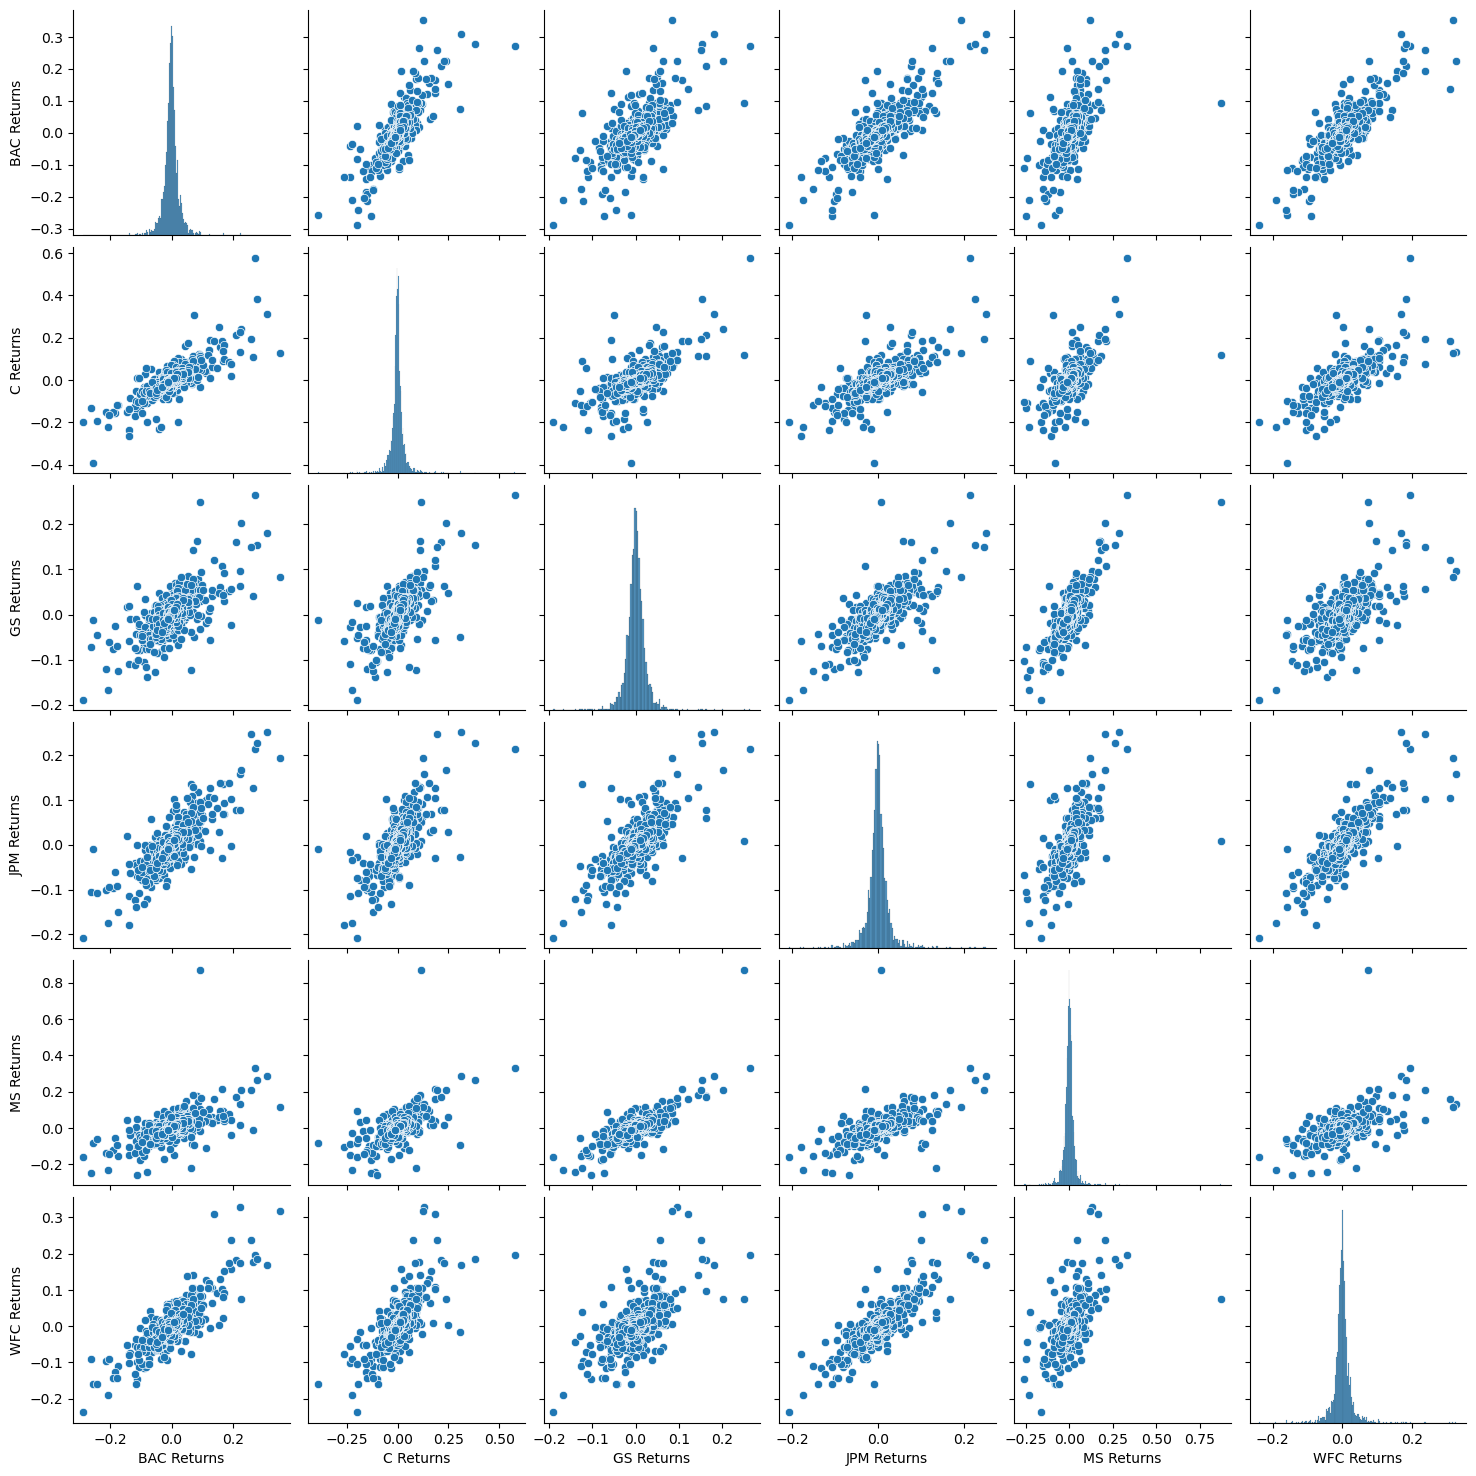

In [15]:
#creating pairplot for above returns of the stock
sns.pairplot(returns[1:])

In [16]:
#which stock has a best and worst single day return
#min
returns.idxmin()

BAC Returns   2009-01-20
C Returns     2009-02-27
GS Returns    2009-01-20
JPM Returns   2009-01-20
MS Returns    2008-10-09
WFC Returns   2009-01-20
dtype: datetime64[ns]

In [17]:
#max
returns.idxmax()

BAC Returns   2009-04-09
C Returns     2008-11-24
GS Returns    2008-11-24
JPM Returns   2009-01-21
MS Returns    2008-10-13
WFC Returns   2008-07-16
dtype: datetime64[ns]

In [18]:
#taking std of the returns 
returns.std()

BAC Returns    0.036647
C Returns      0.038672
GS Returns     0.025390
JPM Returns    0.027667
MS Returns     0.037819
WFC Returns    0.030238
dtype: float64

In [19]:
#std of 2015    #ix deprecated in recent version
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Returns    0.016163
C Returns      0.015289
GS Returns     0.014046
JPM Returns    0.014017
MS Returns     0.016249
WFC Returns    0.012591
dtype: float64

C:\Users\adity\AppData\Local\Temp\ipykernel_16780\635601258.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Returns'],bins=50)


<Axes: xlabel='MS Returns', ylabel='Density'>

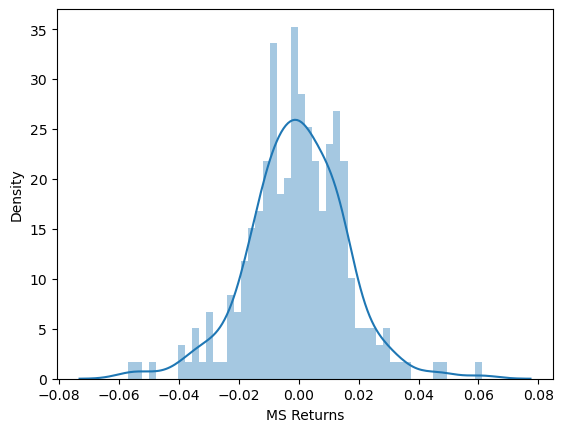

In [20]:
#distplot of 2015 for MS 
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Returns'],bins=50)

C:\Users\adity\AppData\Local\Temp\ipykernel_16780\3995561418.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Returns'],color='red')


<Axes: xlabel='C Returns', ylabel='Density'>

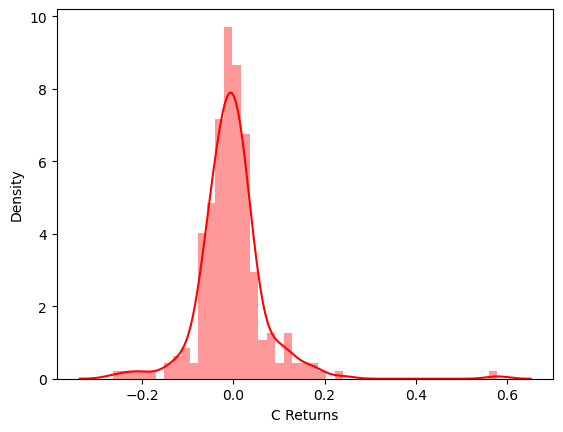

In [21]:
# Distplot for C 
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Returns'],color='red')

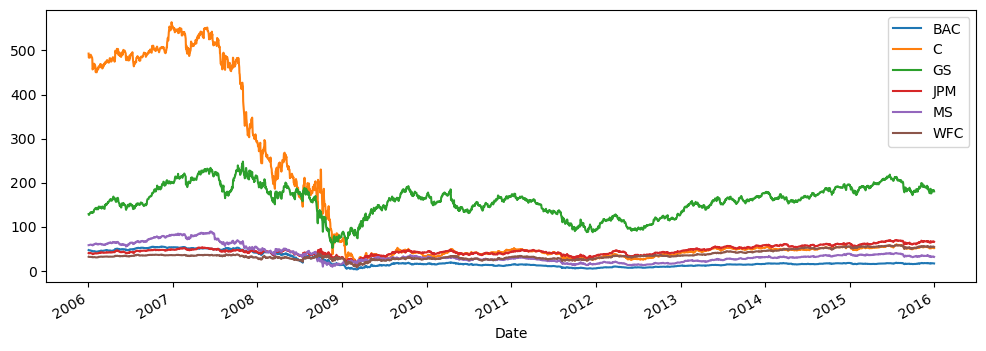

In [22]:
#creating lineplot for closing price for each bank of time
for tick in tickers:
    Bank_stocks[tick]['Close'].plot(label=tick,figsize=(12,4))
plt.legend()

<Axes: xlabel='Date'>

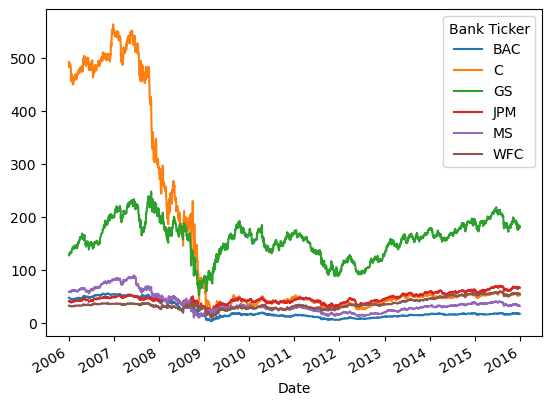

In [23]:
#above plot using xs
Bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [24]:
# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

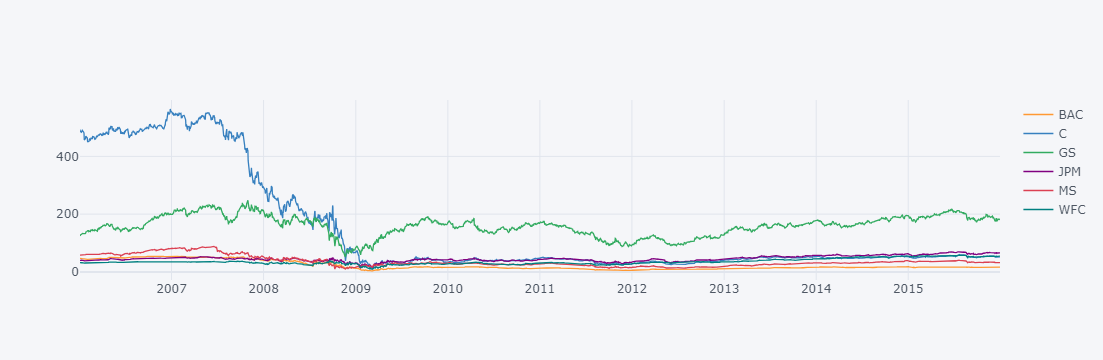

In [25]:
Bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

In [26]:
#MOVING AVERAGE for then year 2008
# plotting the 30 day average against closing price for bac

In [27]:
BAC

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,46.919998,47.180000,46.150002,47.080002,32.425453,16296700
2006-01-04,47.000000,47.240002,46.450001,46.580002,32.081085,17757900
2006-01-05,46.580002,46.830002,46.320000,46.639999,32.122398,14970700
2006-01-06,46.799999,46.910000,46.349998,46.570000,32.074192,12599800
2006-01-09,46.720001,46.970001,46.360001,46.599998,32.094856,15619400
...,...,...,...,...,...,...
2015-12-24,17.320000,17.379999,17.219999,17.270000,14.669743,29369400
2015-12-28,17.219999,17.230000,16.980000,17.129999,14.550819,41777500
2015-12-29,17.250000,17.350000,17.160000,17.280001,14.678235,45670400


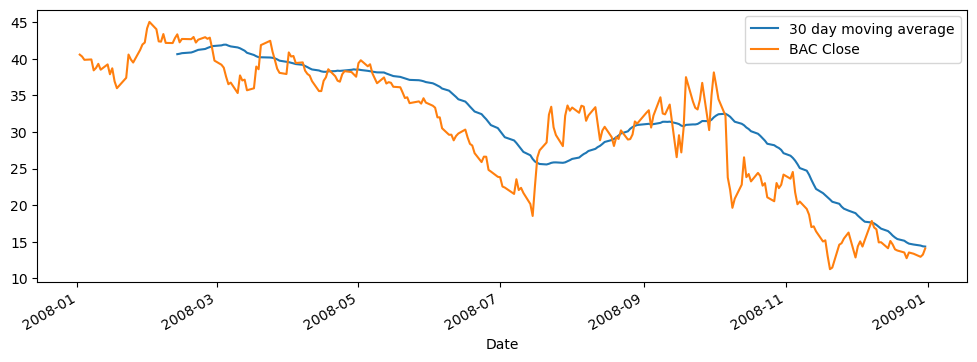

In [28]:
plt.figure(figsize=(12,4))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day moving average')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close')
plt.legend()

In [29]:
#create a heatmap of the correlation betw the stocks clsoe price
Bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.971516,0.550898,0.103874,0.944218,0.008542
C,0.971516,1.000000,0.434123,0.003515,0.933609,-0.068536
GS,0.550898,0.434123,1.000000,0.685286,0.683792,0.499897
JPM,0.103874,0.003515,0.685286,1.000000,0.250427,0.940269
MS,0.944218,0.933609,0.683792,0.250427,1.000000,0.131835
WFC,0.008542,-0.068536,0.499897,0.940269,0.131835,1.000000


<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

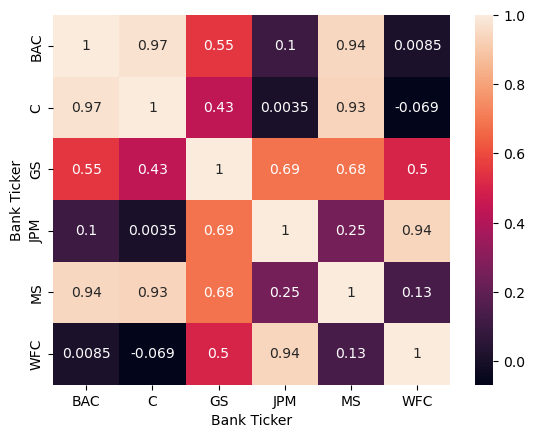

In [30]:
sns.heatmap(Bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

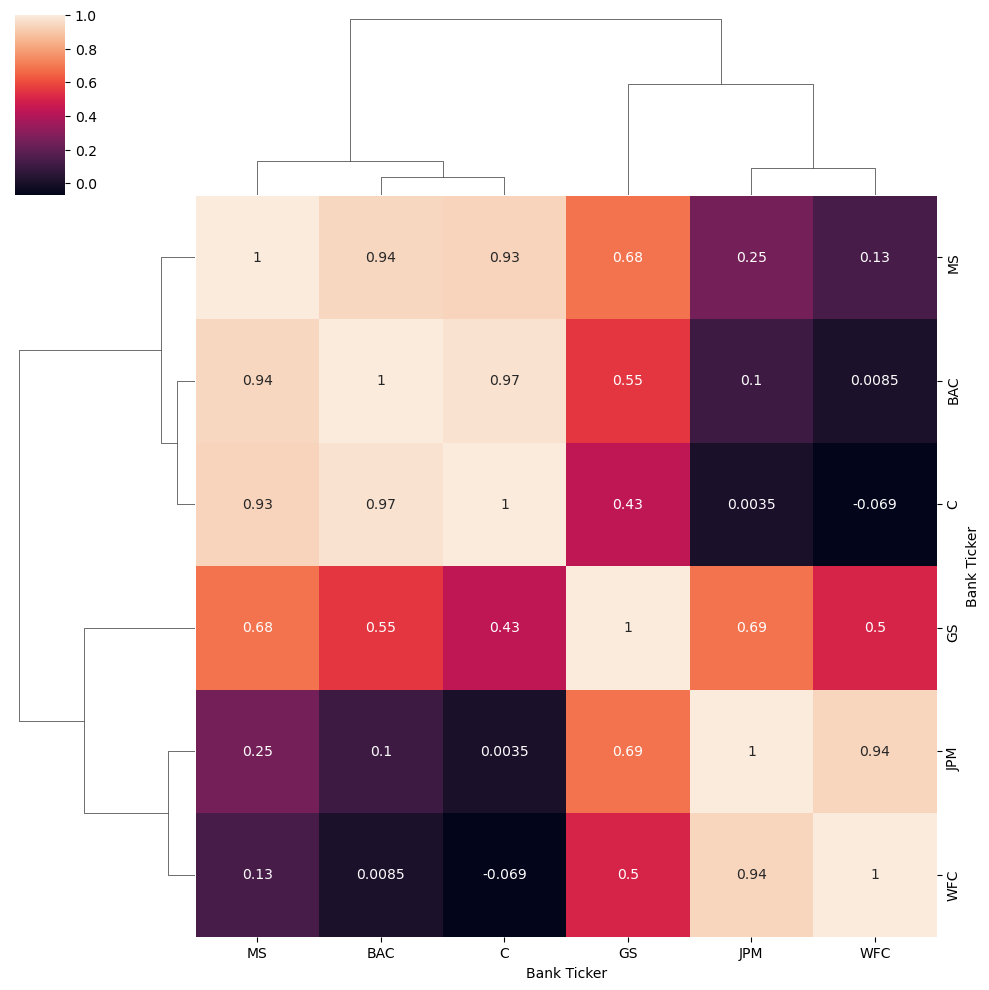

In [31]:
#cluster 
sns.clustermap(Bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [32]:
close_corr=Bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()

In [33]:
close_corr

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.971516,0.550898,0.103874,0.944218,0.008542
C,0.971516,1.000000,0.434123,0.003515,0.933609,-0.068536
GS,0.550898,0.434123,1.000000,0.685286,0.683792,0.499897
JPM,0.103874,0.003515,0.685286,1.000000,0.250427,0.940269
MS,0.944218,0.933609,0.683792,0.250427,1.000000,0.131835
WFC,0.008542,-0.068536,0.499897,0.940269,0.131835,1.000000


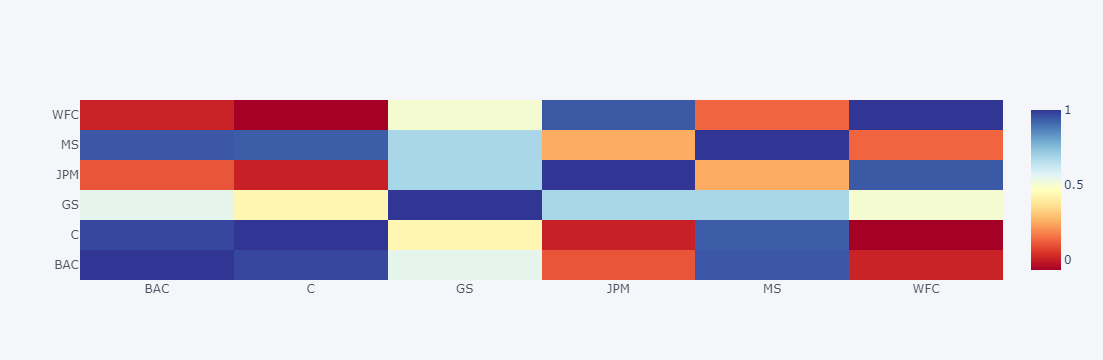

In [34]:
#creating plot using iplot
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

In [35]:
#candleplot of BAC stock from jan 1st 2015 to jan 1st 2016
bac15=BAC[['Open','High','Low','Close']].loc['2015-01-01':'2016-01-01']

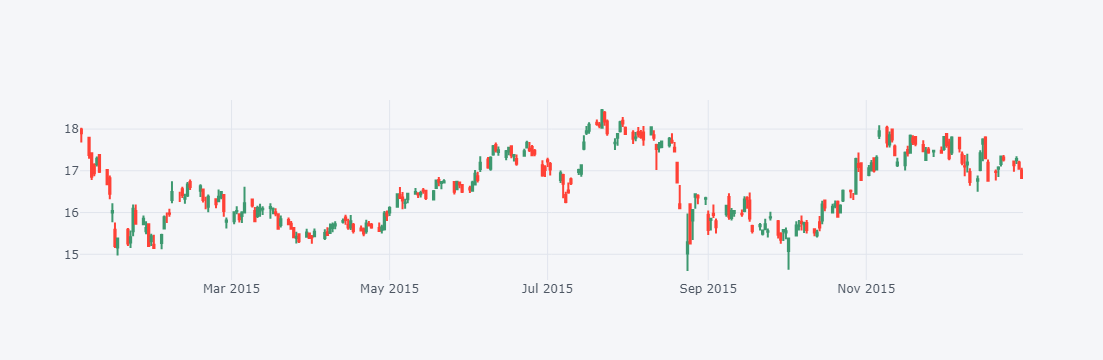

In [36]:
bac15.iplot(kind='candle')

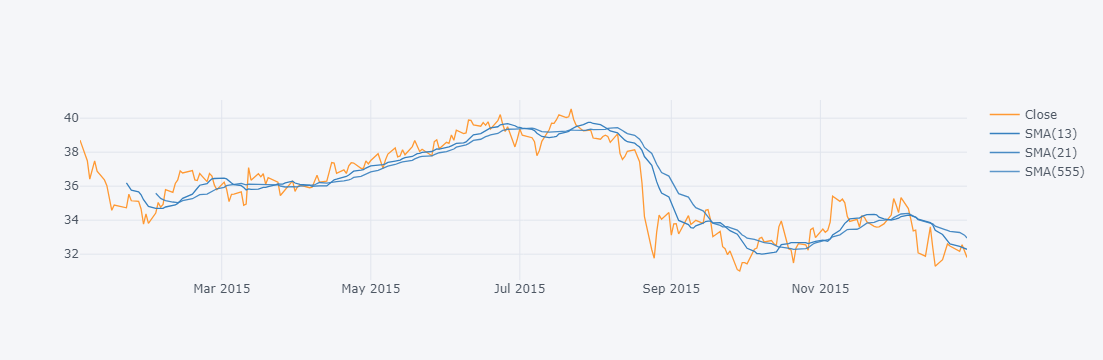

In [37]:
#sma for MS for year 2015
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,555])

In [38]:
#Bollinger plot for BAC
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')